### Initial Imports

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [3]:
# Check the head, info and shape
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
data.shape # Checking the shape

(740, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
# Checking for null values
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
# Statistical resume
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


### Feature Engineering

In [8]:
data['Age cat'] = ['Young employee' if 25 <= age <= 35 else 'Mid age employee' if 36 <= age <= 45 else 'Old employee' if age >= 45 else None\
                      for age in list(data['Age'].values)]

data['Smoke cat'] = ['No' if period <= 0 else 'Yes' if period >=1 else None \
                               for period in list (data['Social smoker'].values)]

data['Absenteeism cat'] = ['No absent' if period <= 0 else 'Late' if period > 0 else None \
                               for period in list (data["Absenteeism time in hours"].values)]

data['Disciplinary cat'] = ['Not taken' if period <= 0 else 'Taken' if period >=1 else None \
                               for period in list (data['Disciplinary failure'].values)]

data['Drink cat'] = ['No' if period <= 0 else 'Yes' if period >=1 else None \
                               for period in list (data['Social drinker'].values)]

data['Education cat'] = ['High school' if  period ==1 else 'Grudate' if  period ==2 else "Postgraduate" if  period ==3 else 'Doctor' if  period ==4 else  None \
                               for period in list (data['Education'].values)]

data['Transportation cat'] = ['Cheap' if 100<= tfare <=200 else 'Expensive' if 200<= tfare <=300 else 'Very expensive' if tfare>300 else None \
                                   for tfare in list(data["Transportation expense"].values)]

data['Distace cat'] = ['Close' if 0<= tfare <=15 else 'Far' if 15 <= tfare <= 35 else 'Very far' if tfare>35 else None \
                                   for tfare in list(data["Distance from Residence to Work"].values)]

In [9]:
# Transforming several columns in categorical variables

In [10]:
data.head() # Check the head again

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Body mass index,Absenteeism time in hours,Age cat,Smoke cat,Absenteeism cat,Disciplinary cat,Drink cat,Education cat,Transportation cat,Distace cat
0,11,26,7,3,1,289,36,13,33,239.554,...,30,4,Young employee,No,Late,Not taken,Yes,High school,Expensive,Very far
1,36,0,7,3,1,118,13,18,50,239.554,...,31,0,Old employee,No,No absent,Taken,Yes,High school,Cheap,Close
2,3,23,7,4,1,179,51,18,38,239.554,...,31,2,Mid age employee,No,Late,Not taken,Yes,High school,Cheap,Very far
3,7,7,7,5,1,279,5,14,39,239.554,...,24,4,Mid age employee,Yes,Late,Not taken,Yes,High school,Expensive,Close
4,11,23,7,5,1,289,36,13,33,239.554,...,30,2,Young employee,No,Late,Not taken,Yes,High school,Expensive,Very far


### EDA and Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:title={'center':'Absenteeism Distribution'}, xlabel='Absenteeism cat', ylabel='count'>

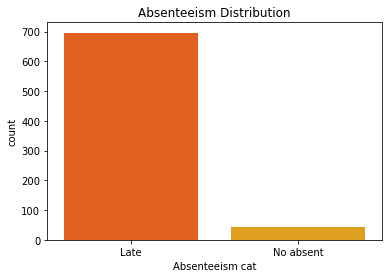

In [12]:
plt.title('Absenteeism Distribution')
sns.countplot(x='Absenteeism cat', data=data, palette='autumn') # We have unbalanced data, let's smote?

<AxesSubplot:title={'center':'Absolute Numbers of absent per Day of the Week'}, xlabel='Day of the week', ylabel='count'>

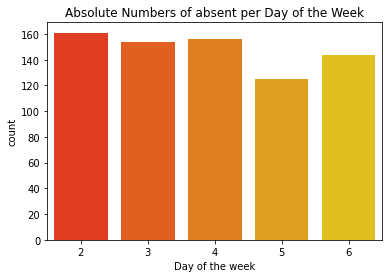

In [13]:
plt.title('Absolute Numbers of absent per Day of the Week')
sns.countplot(x='Day of the week', data=data, palette='autumn') # The first three days of the week
                                                                # the incidence is higher

<AxesSubplot:title={'center':'Absenteeism by Day of the Week'}, xlabel='Day of the week', ylabel='Absenteeism time in hours'>

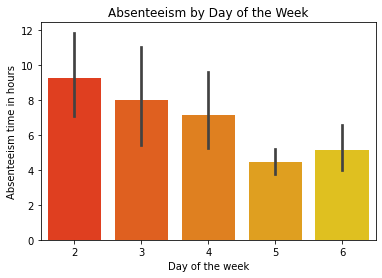

In [14]:
plt.title('Absenteeism by Day of the Week')
sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data, palette='autumn') # The pattern remains 

In [15]:
mean_month = data[['Month of absence', 'Absenteeism time in hours']].groupby('Month of absence'
                                                                             ).mean().reset_index().sort_values(
    'Absenteeism time in hours', ascending = False)

<AxesSubplot:title={'center':'Absenteeism by Month'}, xlabel='Month of absence', ylabel='Absenteeism time in hours'>

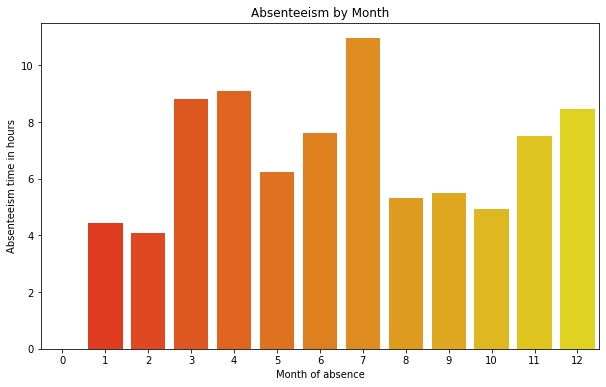

In [16]:
plt.figure(figsize=(10,6))
plt.title('Absenteeism by Month')
sns.barplot(mean_month['Month of absence'], mean_month['Absenteeism time in hours'], palette='autumn')

In [17]:
# Month zero?

<AxesSubplot:title={'center':'Reason of Absence'}, xlabel='Reason for absence', ylabel='count'>

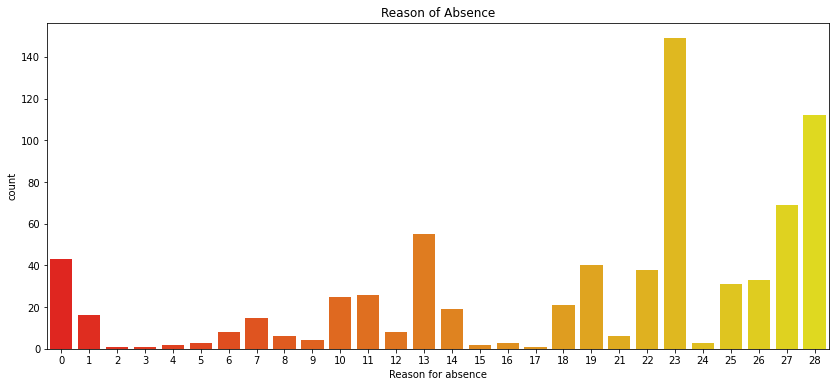

In [18]:
plt.figure(figsize=(14,6))
plt.title('Reason of Absence')
sns.countplot(x='Reason for absence', data=data, palette='autumn') # Medical consultation (23) is the most common
                                                                   # Following by dental consultation (28)
                                                                   # And by physiotherapy (27)

In [19]:
# We calculated the average hours of absenteeism due to absence
mean_reason = data[['Reason for absence', 'Absenteeism time in hours']].groupby('Reason for absence'
                                                                             ).mean().reset_index().sort_values(
    'Absenteeism time in hours', ascending = False)

<AxesSubplot:title={'center':'Reason of Absence'}, xlabel='Reason for absence', ylabel='Absenteeism time in hours'>

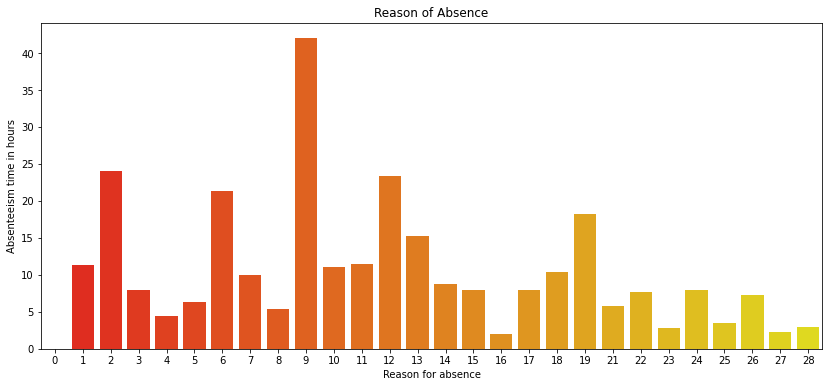

In [20]:
plt.figure(figsize=(14,6))
plt.title('Reason of Absence')
sns.barplot(mean_reason['Reason for absence'], mean_reason['Absenteeism time in hours'], palette='autumn')
# The reason 9 is due to cardiovascular disease

In [21]:
# Now we calculated the sum
sum_reason = data[['Reason for absence', 'Absenteeism time in hours']].groupby('Reason for absence'
                                                                             ).sum().reset_index().sort_values(
    'Absenteeism time in hours', ascending = False)

<AxesSubplot:title={'center':'Reason of Absence'}, xlabel='Reason for absence', ylabel='Absenteeism time in hours'>

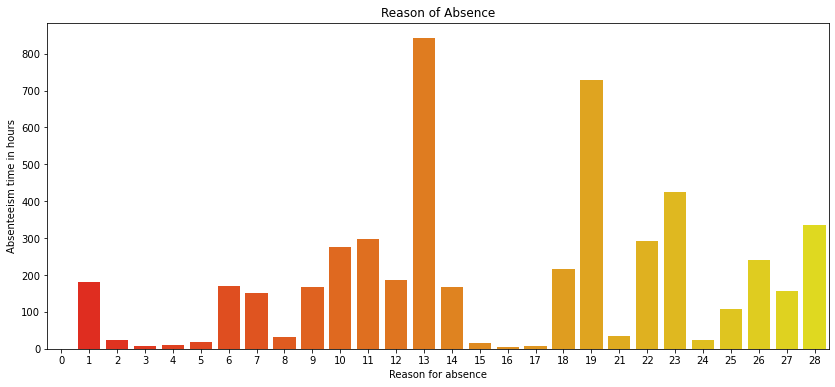

In [22]:
plt.figure(figsize=(14,6))
plt.title('Reason of Absence')
sns.barplot(sum_reason['Reason for absence'], sum_reason['Absenteeism time in hours'], palette='autumn')
# The reason 13 is due to musculoskeletal disorders
# This could be because of an occupation that requires a lot of physical effort
# or because workers are experiencing great emotional stress

<AxesSubplot:title={'center':'Level of Education'}, xlabel='Education cat', ylabel='Absenteeism time in hours'>

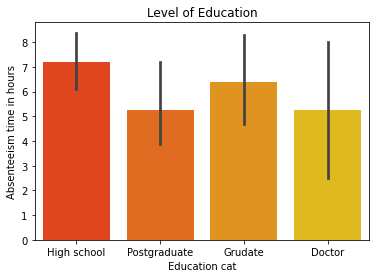

In [23]:
plt.title('Level of Education')
sns.barplot(x='Education cat', y='Absenteeism time in hours', data=data, palette='autumn')
# It seems that the incidence of absenteeism is not affected by the level of education

### Modeling Data

In [24]:
data.drop(['ID','Age cat','Education cat','Transportation cat','Transportation expense','Disciplinary cat',
           'Pet','Seasons','Weight','Height','Distace cat','Drink cat','Smoke cat','Service time','Absenteeism time in hours','Son'],
          axis=1, inplace=True)

In [25]:
data['Absenteeism cat'] = data['Absenteeism cat'].map({'Late':1, 'No absent':0})

In [26]:
data.head()

,Reason for absence,Month of absence,Day of the week,Distance from Residence to Work,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Social drinker,Social smoker,Body mass index,Absenteeism cat
0,26,7,3,36,33,239.554,97,0,1,1,0,30,1
1,0,7,3,13,50,239.554,97,1,1,1,0,31,0
2,23,7,4,51,38,239.554,97,0,1,1,0,31,1
3,7,7,5,5,39,239.554,97,0,1,1,1,24,1
4,23,7,5,36,33,239.554,97,0,1,1,0,30,1


### Spliting the Data

In [27]:
# Split the data and use SMOTE
X = data.drop('Absenteeism cat', axis=1)
y = data['Absenteeism cat']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split (X, y, test_size=0.4, random_state=42)

In [29]:
# Checking the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((444, 12), (296, 12), (444,), (296,))

### SMOTE

In [30]:
# for unbalanced data, we use SMOTE, this gives the model more examples of the target variable
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [31]:
X_sm.shape, y_sm.shape  #checking the shape after oversampling

((830, 12), (830,))

### Create and Train the Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Train the model
model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=6,
                               min_samples_split=6, random_state=42)
model.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=200, random_state=42)

### Predictions

In [34]:
predictions = model.predict(X_test)

### Evaluating the Model

In [35]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score

In [36]:
# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       281

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



In [37]:
print(roc_auc_score(y_test, predictions))

1.0


### Feature Importance

In [55]:
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
importances = model.feature_importances_std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)

In [56]:
forest_importances = pd.Series(importances, index= feature_names)

Text(0, 0.5, 'Mean Decrease in Impurity')

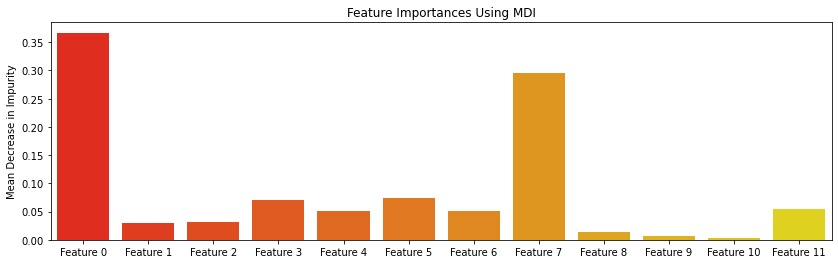

In [60]:
plt.figure(figsize=(14,4))
sns.barplot(x= feature_names, y= forest_importances, palette='autumn')
plt.title('Feature Importances Using MDI')
plt.ylabel('Mean Decrease in Impurity')

### Conclusion

In [38]:
# We have a good model, we reached over 100%
# Maybe overfiting?

### Save the model

In [39]:
import joblib

In [40]:
filename = 'model.sav'

In [41]:
joblib.dump(model,filename)

['model.sav']